In [ ]:
import pandas as pd


In [94]:
scholar_file = '../citation_data/chiir2024.all-scholar-IDs.tsv'
metadata_file = '../citation_data/all-data.tsv'

scholar_ids = pd.read_csv(bla_file, sep='\t')
scholar_ids = scholar_ids.rename(columns={'result_id': 'cited_id', 'title': 'scholar_title'})

metadata = pd.read_csv(metadata_file, sep='\t')
column_map = {
    'DOI': 'meta_cited_doi', 
    'title': 'meta_cited_title', 
    'authors': 'meta_cited_authors'
}
metadata = metadata.rename(columns=column_map)
metadata = pd.merge(metadata, scholar_ids, left_on='meta_cited_doi', right_on='doi')
metadata.head(2)


,zotero_ID,meta_cited_doi,meta_cited_authors,meta_cited_title,year,type,pages,codes,keywords,abstract,open_access,PDF_url,doi,cited_id,cited_by_id,scholar_title
0,XGUZEDFP,10.1145/3343413.3377941,"Avula, Sandeep; Arguello, Jaime",Wizard of Oz Interface to Study System Initiat...,2020,demo,447–451,completed; toine; design;method;log analysis; ...,collaborative search; conversational search; m...,"We describe a Wizard of Oz (WoZ) system, a Web...",True,https://dl.acm.org/doi/pdf/10.1145/3343413.337...,10.1145/3343413.3377941,vbxjxXt5PqAJ,11546800067124116669,Wizard of oz interface to study system initiat...
1,SQ8DVDUY,10.1145/3176349.3176392,"Meier, Florian; Elsweiler, David",Other Times It's Just Strolling Back Through M...,2018,long,130–139,completed; design;method;questionnaire; design...,personal information management; survey; socia...,Returning to previously viewed or possessed in...,False,NaN,10.1145/3176349.3176392,bidzpHHl3NwJ,15914847459473565550,Other Times Itźs Just Strolling Back Through M...


In [89]:
metadata.columns

Index(['zotero_ID', 'doi', 'authors', 'meta_title', 'year', 'type', 'pages',
       'codes', 'keywords', 'abstract', 'open_access', 'PDF_url', 'cited_id',
       'cited_by_id', 'scholar_title'],
      dtype='object')

In [30]:
metadata[metadata.cited_id == '-3_Jqg7njDAJ']

,zotero_ID,doi,authors,meta_title,year,type,pages,codes,keywords,abstract,open_access,PDF_url,cited_id,cited_by_id,scholar_title
116,58ISS2MQ,10.1145/3295750.3298923,"Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...,2019,long,143–151,completed; design;method;questionnaire; design...,user study; context; field study; mobile search,Improvements in mobile technologies have led t...,False,NaN,-3_Jqg7njDAJ,3498425060740923387,Understanding mobile search task relevance and...


In [32]:
metadata[['scholar_title', 'meta_title']]

,scholar_title,meta_title
0,Wizard of oz interface to study system initiat...,Wizard of Oz Interface to Study System Initiat...
1,Other Times Itźs Just Strolling Back Through M...,Other Times It's Just Strolling Back Through M...
2,A Standardised Format for Exchanging User Stud...,A Standardised Format for Exchanging User Stud...
3,Data-driven evaluation metrics for heterogeneo...,Data-Driven Evaluation Metrics for Heterogeneo...
4,Information Needs of the End Users Have Never...,Information Needs of the End Users Have Never ...
...,...,...
402,Nested Contexts of Music Information Retrieval...,Nested Contexts of Music Information Retrieval...
403,Eyes on Immersive Search: Eye-Tracking Study o...,Eyes on Immersive Search: Eye-Tracking Study o...
404,Assessing Google Search's New Features in Supp...,Assessing Google Search’s New Features in Supp...
405,Quality Conversations and Considerations on Re...,Quality Conversations and Considerations on Re...


In [8]:
cited_file = '../citation_data/chiir2024.cited-papers.all-version.tsv'

cited_versions = pd.read_csv(cited_file, sep='\t')
cited_versions = cited_versions.rename(columns={'doi': 'scholar_id'})
cited_versions.head(2)

,scholar_id,rank,format,link,file_link
0,--gjvQEbNzkJ,1,PDF,https://www.academia.edu/download/60466877/inf...,https://www.academia.edu/download/60466877/inf...
1,--gjvQEbNzkJ,2,PDF,https://www.researchgate.net/profile/Rebecca-R...,https://www.researchgate.net/profile/Rebecca-R...


In [99]:
citation_file = '../citation_data/chiir2024.all-citing-docs.tsv'

citations = pd.read_csv(citation_file, sep='\t')
citations = pd.merge(citations, metadata[['cited_id', 'meta_cited_authors', 'meta_cited_title']], on='cited_id')
citations.head(2)

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary,meta_cited_authors,meta_cited_title
0,-3_Jqg7njDAJ,1,udPgGGLdjxgJ,2021.0,27.0,Deconstructing search tasks in interactive inf...,"J Liu - Information Processing & Management, 2...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...
1,-3_Jqg7njDAJ,2,IEf-LdOdLIEJ,2021.0,34.0,A survey of computational methods for online m...,"EA Ríssola, DE Losada, F Crestani - ACM Transa...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...


In [100]:
citing_id = '_3M_k4hA0gUJ'
citations[citations.citing_id == citing_id]

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary,meta_cited_authors,meta_cited_title
4060,k4Evu8TMWgIJ,270,_3M_k4hA0gUJ,1911.0,2.0,CROWN: Conversational Passage Ranking by Reaso...,"M Kaiser, RS Roy, G Weikum - arXiv preprint ar...","Radlinski, Filip; Craswell, Nick",A Theoretical Framework for Conversational Search


In [101]:
cited_id = 'k4Evu8TMWgIJ'

metadata[metadata.cited_id == cited_id]


,zotero_ID,meta_cited_doi,meta_cited_authors,meta_cited_title,year,type,pages,codes,keywords,abstract,open_access,PDF_url,doi,cited_id,cited_by_id,scholar_title
126,TTYP2S6Z,10.1145/3020165.3020183,"Radlinski, Filip; Craswell, Nick",A Theoretical Framework for Conversational Search,2017,long,117–126,completed; domain;personal information; toine;...,conversational search; chatbot; personal agent,This paper studies conversational approaches t...,False,NaN,10.1145/3020165.3020183,k4Evu8TMWgIJ,169673081305923987,A theoretical framework for conversational search


In [195]:
import os

def parse_doc_id(doc_id):
    fdir, fname = os.path.split(doc_id)
    scholar_id, version, *rest = fname.split('.')
    return scholar_id, version


def add_scholar_id(citation_contexts):
    citation_contexts['parsed_doc_id'] = citation_contexts.doc_id.apply(parse_doc_id)
    citation_contexts['citing_id'] = citation_contexts.parsed_doc_id.apply(lambda x: x[0])
    citation_contexts['citing_version'] = citation_contexts.parsed_doc_id.apply(lambda x: x[1])
    
def get_version_with_max_refs(citation_contexts):
    citation_contexts['num_refs'] = citation_contexts.groupby('parsed_doc_id').parsed_doc_id.transform('count')
    max_versions = list(citation_contexts.loc[citation_contexts.groupby(['citing_id'])["num_refs"].idxmax()].parsed_doc_id)
    return citation_contexts[citation_contexts.parsed_doc_id.isin(max_versions)]


def read_citation_contexts(citation_context_file):
    citation_contexts = pd.read_csv(citation_context_file, sep='\t')
    citation_contexts = citation_contexts.drop('citing_id', axis=1)
    citation_contexts = citation_contexts.rename(columns={'cited_id': 'cited_bibl_id'})
    add_scholar_id(citation_contexts)
    citation_contexts = get_version_with_max_refs(citation_contexts)
    return citation_contexts


base_dir = "/Volumes/T7_Shield/Data/CHIIR-papers/citing_papers"
citation_context_file = f'{base_dir}/citation_contexts/test_citation_contexts.tsv'

citation_contexts = read_citation_contexts(citation_context_file)
citation_contexts.head(2)

,doc_id,cit_count,citing_author,citing_title,cited_bibl_id,cited_author,cited_title,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_id,citing_version,num_refs
0,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,1,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"F Radlinski, N Craswell",A theoretical framework for conversational search,"Radlinski, F., Craswell, N.: A theoretical fra...",[15],First steps to formalizing conversational sear...,"However, current commercial systems cannot han...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
1,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,2,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"G Ren, X Ni, M Malik, Q Ke",Conversational query understanding using seque...,"Ren, G., Ni, X., Malik, M., Ke, Q.: Conversati...",[18],"Furthermore, a query reformulation approach is...",First steps to formalizing conversational sear...,Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26


In [196]:
citation_contexts.shape

(109644, 16)

In [197]:

citation_contexts.head(2)

,doc_id,cit_count,citing_author,citing_title,cited_bibl_id,cited_author,cited_title,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_id,citing_version,num_refs
0,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,1,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"F Radlinski, N Craswell",A theoretical framework for conversational search,"Radlinski, F., Craswell, N.: A theoretical fra...",[15],First steps to formalizing conversational sear...,"However, current commercial systems cannot han...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
1,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,2,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"G Ren, X Ni, M Malik, Q Ke",Conversational query understanding using seque...,"Ren, G., Ni, X., Malik, M., Ke, Q.: Conversati...",[18],"Furthermore, a query reformulation approach is...",First steps to formalizing conversational sear...,Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26


In [67]:
citations.head(2)

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary
0,-3_Jqg7njDAJ,1,udPgGGLdjxgJ,2021.0,27.0,Deconstructing search tasks in interactive inf...,"J Liu - Information Processing & Management, 2..."
1,-3_Jqg7njDAJ,2,IEf-LdOdLIEJ,2021.0,34.0,A survey of computational methods for online m...,"EA Ríssola, DE Losada, F Crestani - ACM Transa..."


In [198]:
print('Total number of citing-cited pairs:', citations[['citing_id', 'cited_id']].drop_duplicates().shape[0])

Total number of citing-cited pairs: 5540


In [77]:
# check that citing ID appears in the citations frame
citations[citations.citing_id == '_3M_k4hA0gUJ']

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary
4060,k4Evu8TMWgIJ,270,_3M_k4hA0gUJ,1911.0,2.0,CROWN: Conversational Passage Ranking by Reaso...,"M Kaiser, RS Roy, G Weikum - arXiv preprint ar..."


In [199]:
# check the citation contexts for the given citing ID
citation_contexts[citation_contexts.citing_id == '_3M_k4hA0gUJ']

,doc_id,cit_count,citing_author,citing_title,cited_bibl_id,cited_author,cited_title,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_id,citing_version,num_refs
0,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,1,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"F Radlinski, N Craswell",A theoretical framework for conversational search,"Radlinski, F., Craswell, N.: A theoretical fra...",[15],First steps to formalizing conversational sear...,"However, current commercial systems cannot han...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
1,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,2,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"G Ren, X Ni, M Malik, Q Ke",Conversational query understanding using seque...,"Ren, G., Ni, X., Malik, M., Ke, Q.: Conversati...",[18],"Furthermore, a query reformulation approach is...",First steps to formalizing conversational sear...,Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
2,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,3,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"H Cao, D Jiang, J Pei, E Chen, H Li",Towards context-aware search by learning a ver...,"Cao, H., Jiang, D., Pei, J., Chen, E., Li, H.:...","[3,","Apart from that, work on search sessions [3,22...","Furthermore, a query reformulation approach is...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
3,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,4,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"X Shen, B Tan, C Zhai",Context-sensitive information retrieval using ...,"Shen, X., Tan, B., Zhai, C.: Context-sensitive...","22,","Apart from that, work on search sessions [3,22...","Furthermore, a query reformulation approach is...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
4,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,5,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"A Sun, H Lou",Towards context-aware search with right click,"Sun, A., Lou, C.H.: Towards context-aware sear...",24],"Apart from that, work on search sessions [3,22...","Furthermore, a query reformulation approach is...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
5,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,6,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"Z Bar-Yossef, N Kraus",Context-sensitive query auto-completion,"Bar-Yossef, Z., Kraus, N.: Context-sensitive q...","[1,",Further works on search sessions focus on quer...,"Apart from that, work on search sessions [3,22...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
6,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,7,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"L Li, H Deng, A Dong, Y Chang, R Baeza-Yates, ...",Exploring query auto-completion and click logs...,"Li, L., Deng, H., Dong, A., Chang, Y., Baeza-Y...",12],Further works on search sessions focus on quer...,"Apart from that, work on search sessions [3,22...",Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
7,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,8,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"P Rajpurkar, J Zhang, K Lopyrev, P Liang","Squad: 100,000+ questions for machine comprehe...","Rajpurkar, P., Zhang, J., Lopyrev, K., Liang, ...",[16],"In machine reading comprehension, answers to q...",Conversations in reading comprehension. In mac...,Related Work,"(_3M_k4hA0gUJ, 1)",_3M_k4hA0gUJ,1,26
8,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,9,"Magdalena Kaiser, Saha Roy, Gerhard Weikum",CROWN: Conversational Passage Ranking by Reaso...,NaN,"A Elgohary, C Zhao, J Boyd-Graber",A dataset and baselines for sequential open-do...,"Elgohary, 

In [200]:
citations.shape, citation_contexts.shape

((5540, 9), (109644, 16))

In [201]:
cited_contexts = pd.merge(citations, citation_contexts, on='citing_id')
cited_contexts.head(2)

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary,meta_cited_authors,meta_cited_title,doc_id,...,cited_author,cited_title,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_version,num_refs
0,-3_Jqg7njDAJ,5,SQ-HLdIXFpUJ,2021.0,25.0,Towards facet-driven generation of clarifying ...,"I Sekulić, M Aliannejadi, F Crestani - Proceed...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,"Avishek Anand, Lawrence Cavedon, Hideo Joho, M...",Conversational Search (Dagstuhl Seminar 19461),"Avishek Anand, Lawrence Cavedon, Hideo Joho, M...","[4,",Early work on the topic identified several com...,With the recent rise in popularity of conversa...,INTRODUCTION,"(SQ-HLdIXFpUJ, 2)",2,106
1,-3_Jqg7njDAJ,5,SQ-HLdIXFpUJ,2021.0,25.0,Towards facet-driven generation of clarifying ...,"I Sekulić, M Aliannejadi, F Crestani - Proceed...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,"Filip Radlinski, Nick Craswell",A theoretical framework for conversational search,Filip Radlinski and Nick Craswell. 2017. A the...,33],Early work on the topic identified several com...,With the recent rise in popularity of conversa...,INTRODUCTION,"(SQ-HLdIXFpUJ, 2)",2,106


In [202]:
print('Total number of citing-cited pairs:', citations[['citing_id', 'cited_id']].drop_duplicates().shape[0])
print('Number of citing papers with citation contexts:', citation_contexts.citing_id.nunique())
print('expected number of citing-cited pairs in contexts:', cited_contexts[['citing_id', 'cited_id']].drop_duplicates().shape[0])


Total number of citing-cited pairs: 5540
Number of citing papers with citation contexts: 1125
expected number of citing-cited pairs in contexts: 1677


In [203]:
cited_contexts.shape

(181368, 24)

In [204]:
cited_contexts.citing_id.nunique()

1099

In [206]:
from Levenshtein import distance

def get_title_dist(row):
    if isinstance(row['meta_cited_title'], str) and isinstance(row['cited_title'], str):
        return distance(row['meta_cited_title'].lower(), row['cited_title'].lower())
    elif isinstance(row['meta_cited_title'], str):
        return len(row['meta_cited_title'])
    elif isinstance(row['cited_title'], str):
        return len(row['cited_title'])
    else:
        return 200
    

def get_title_sim(row):
    len_title = len(row['meta_cited_title'])
    return 1 - (row['title_dist'] / len_title)


cited_contexts['title_dist'] = cited_contexts.apply(get_title_dist, axis=1)
cited_contexts['title_sim'] = cited_contexts.apply(get_title_sim, axis=1)
cited_contexts.head(2)

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary,meta_cited_authors,meta_cited_title,doc_id,...,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_version,num_refs,title_dist,title_sim
0,-3_Jqg7njDAJ,5,SQ-HLdIXFpUJ,2021.0,25.0,Towards facet-driven generation of clarifying ...,"I Sekulić, M Aliannejadi, F Crestani - Proceed...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,"Avishek Anand, Lawrence Cavedon, Hideo Joho, M...","[4,",Early work on the topic identified several com...,With the recent rise in popularity of conversa...,INTRODUCTION,"(SQ-HLdIXFpUJ, 2)",2,106,50,0.305556
1,-3_Jqg7njDAJ,5,SQ-HLdIXFpUJ,2021.0,25.0,Towards facet-driven generation of clarifying ...,"I Sekulić, M Aliannejadi, F Crestani - Proceed...","Aliannejadi, Mohammad; Harvey, Morgan; Costa, ...",Understanding Mobile Search Task Relevance and...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,Filip Radlinski and Nick Craswell. 2017. A the...,33],Early work on the topic identified several com...,With the recent rise in popularity of conversa...,INTRODUCTION,"(SQ-HLdIXFpUJ, 2)",2,106,57,0.208333


In [207]:
cited_contexts[cited_contexts.title_sim > 0.8][['cited_id', 'citing_id']].drop_duplicates().shape

(1423, 2)

In [208]:
cited_contexts[cited_contexts.title_sim > 0.8].citing_id.nunique()

942

In [228]:
select_cols = [
    'cited_id', 'cited_author', 'cited_title', 
    'citing_id', 'citing_author', 'citing_title', 
    'citation_ref', 'citation_sent', 'citation_context', 
    'title_dist', 'title_sim',
    #'cited_title', 'meta_cited_title', 'cited_author', 'meta_cited_authors'
]
cited_contexts[cited_contexts.title_dist < 30][select_cols].sort_values('title_dist')
cited_contexts[cited_contexts.title_sim > 0.6][select_cols].sort_values('title_dist')
print('number of citation contexts for CHIIR papers:', cited_contexts[cited_contexts.title_sim > 0.6].shape[0])

cited_contexts[cited_contexts.title_sim > 0.6][select_cols].to_csv('../citation_contexts/chiir_papers-citation_contexts.tsv')

number of citation contexts for CHIIR papers: 2698


In [119]:
cited_contexts.shape

(3402, 25)

<Axes: xlabel='title_dist', ylabel='Density'>

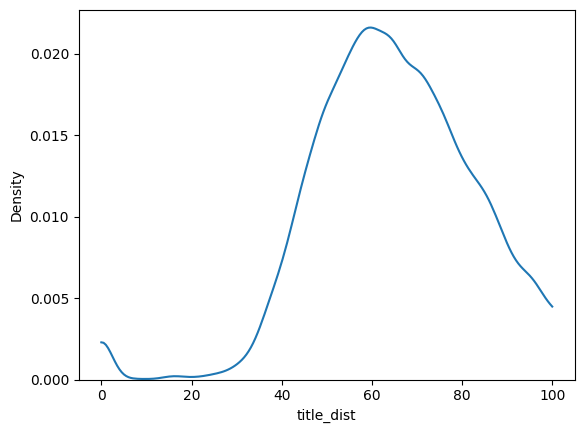

In [176]:
import seaborn as sns


sns.kdeplot(data=cited_contexts, x='title_dist', clip=(0,100))

<Axes: xlabel='title_sim', ylabel='Density'>

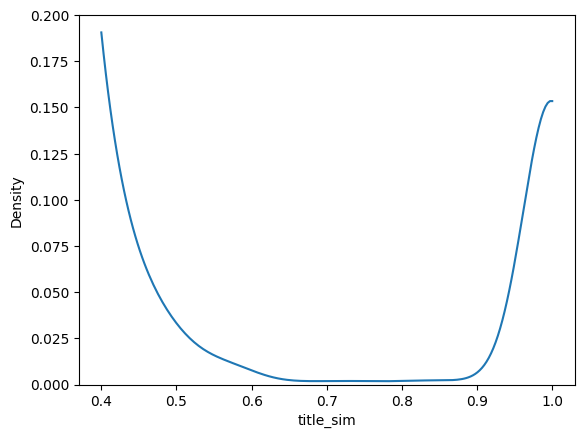

In [225]:
sns.kdeplot(data=cited_contexts, x='title_sim', clip=(0.4,1))

In [140]:
found_pairs = set(cited_contexts[cited_contexts.title_dist < 10][['cited_id', 'citing_id']].drop_duplicates().apply(lambda row: f"{row['cited_id']}____{row['citing_id']}", axis=1))
cited_pairs = set(cited_contexts[['cited_id', 'citing_id']].drop_duplicates().apply(lambda row: f"{row['cited_id']}____{row['citing_id']}", axis=1))
missing_pairs = [pair.split('____') for pair in cited_pairs - found_pairs]
missing_pairs

[['1sLx_SD4d48J', '-3_aTkNDJiAJ'],
 ['eRHS244uKmIJ', '06vjHf-R6j0J'],
 ['OgJDNXIQQpYJ', '_B-5ULenTqIJ'],
 ['x0OpNx-lh58J', '-1MVeiO9qO8J'],
 ['zHHilv6ODIUJ', '03C5LQ-NhncJ'],
 ['naIz1SEOH28J', '_fdZjZPDTzAJ'],
 ['tF7XWVJ15U4J', '03C5LQ-NhncJ'],
 ['sNpd4kXWdRMJ', '_ZLeU1PK_CMJ'],
 ['UJ36srGw8CsJ', '03C5LQ-NhncJ']]

In [148]:
found_pairs = cited_contexts[cited_contexts.title_dist < 10][['cited_id', 'citing_id']].drop_duplicates()
cited_pairs = cited_contexts[['cited_id', 'citing_id']].drop_duplicates()
s = pd.concat([found_pairs, cited_pairs]).value_counts().rename('freq').reset_index()
missing = s[s.freq == 1]
missing

,cited_id,citing_id,freq
23,naIz1SEOH28J,_fdZjZPDTzAJ,1
24,OgJDNXIQQpYJ,_B-5ULenTqIJ,1
25,eRHS244uKmIJ,06vjHf-R6j0J,1
26,sNpd4kXWdRMJ,_ZLeU1PK_CMJ,1
27,tF7XWVJ15U4J,03C5LQ-NhncJ,1
28,x0OpNx-lh58J,-1MVeiO9qO8J,1
29,UJ36srGw8CsJ,03C5LQ-NhncJ,1
30,zHHilv6ODIUJ,03C5LQ-NhncJ,1
31,1sLx_SD4d48J,-3_aTkNDJiAJ,1


In [151]:
cited_contexts[cited_contexts.citing_id == '_B-5ULenTqIJ'].sort_values('title_dist')

,cited_id,position,citing_id,year,citation_count,title,publication_info_summary,meta_cited_authors,meta_cited_title,doc_id,...,cited_title,cited_raw,citation_ref,citation_sent,citation_context,section_title,parsed_doc_id,citing_version,num_refs,title_dist
2365,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,Tetris-: Exploring human performance via cross...,"Catherine Sibert, Wayne D. Gray, and John K. L...","81,",Other researchers worked to study human perfor...,Several kinds of researchers have worked on he...,Introduction -- Related work,"(_B-5ULenTqIJ, 0)",0,106,58
2395,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,"Total Tetris: Tetris with monominoes, dominoes...","Erik D. Demaine, Martin L. Demaine, Sarah Eise...",[34],This work was generalized to show NP-completen...,"number of rows cleared, number of moves before...",Introduction -- Related work,"(_B-5ULenTqIJ, 0)",0,106,59
2366,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,Exploring human strategies via cross entropy r...,"Catherine Sibert, John K. Lindstedt, and Wayne...",82],Other researchers worked to study human perfor...,Several kinds of researchers have worked on he...,Introduction -- Related work,"(_B-5ULenTqIJ, 0)",0,106,60
2367,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,Time series and case-based reasoning for an in...,"Diana Sofía Lora Ariza, Antonio A. Sánchez-Rui...","[9,",The issue of dynamically adjusting the difficu...,Other researchers worked to study human perfor...,Introduction -- Related work,"(_B-5ULenTqIJ, 0)",0,106,60
2414,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,Towards polynomial lower bounds for dynamic pr...,Mihai Pătraşcu. Towards polynomial lower bound...,[78],The following problem was introduced by Pătraş...,The following problem was introduced by Pătraş...,A few hardness conjectures -- Pătraşcu's Multi...,"(_B-5ULenTqIJ, 0)",0,106,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,NaN,NaN,([58],Their results in particular imply the followin...,"On the one hand, Kopelowitz et al. [58] have t...",A few hardness conjectures -- Pătraşcu's Multi...,"(_B-5ULenTqIJ, 0)",0,106,86
2419,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greedily with Rect...,"J Dallant, J Iacono - arXiv preprint arXiv:220...","Wilson, Max L.",The Tetris Model of Resolving Information Need...,/Volumes/T7_Shield/Data/CHIIR-papers/citing_pa...,...,NaN,NaN,([43],▶ Theorem 11 ([43]).,"▶ Theorem 11 ([43]). Under the OMv conjecture,...",A few hardness conjectures -- Pătraşcu's Multi...,"(_B-5ULenTqIJ, 0)",0,106,86
2356,OgJDNXIQQpYJ,5,_B-5ULenTqIJ,2202.0,NaN,How Fast Can We Play Tetris Greed